# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *12장 오토인코더와 잠재 표현 학습*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### LAB12-1 오토인코더로 차원 축소하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # 롤 데이터 생성하기    
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T

m = 1500
X, color = make_a_roll(m)

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
enc = models.Sequential([layers.Dense(2, input_shape=[3], 
                                         activation = 'elu')])
dec = models.Sequential([layers.Dense(3, input_shape=[2], 
                                         activation = 'elu')])

In [3]:
AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 8         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
47/47 [==============================] - 3s 2ms/step - loss: 0.1533
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1331
Epoch 3/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1240
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1074
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1041
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 0.0959
Epoch 8/30
47/47 [==============================] - 0s 2ms/step - loss: 0.0895
Epoch 9/30
47/47 [==============================] - 0s 2ms/step - loss: 0.0847
Epoch 10/30
47/47 [==============================] - 0s 2ms/step - loss: 0.0769
Epoch 11/30
47/47 [==============================] - 0s 2ms/step - loss: 0.0755
Epoch 12/30
47/47 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 13/30
47/47 [==============================

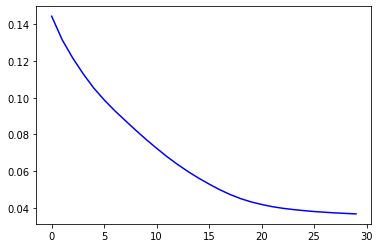

In [4]:
history = AE.fit(X, X, epochs = 30)
plt.plot(history.history['loss'], 'b-')

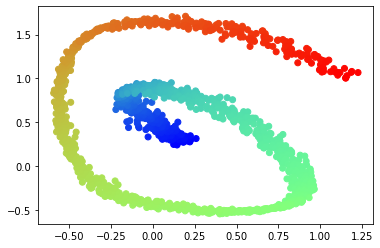

In [5]:
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()

### LAB 12-2 다층 구조 오토인코더로 차원 축소/복원

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # Creating dataset    
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T    

m = 1500
X, color = make_a_roll(m)

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(2, input_shape=[3], 
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(2, activation='elu')])
dec = models.Sequential([layers.Dense(2, input_shape=[2],
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(3, activation='elu')])


In [8]:
AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
history = AE.fit(X, X, epochs = 30)

Epoch 1/30
47/47 [==============================] - 1s 2ms/step - loss: 0.4155
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 0.3155
Epoch 3/30
47/47 [==============================] - 0s 2ms/step - loss: 0.2788
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 0.2429
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 0.2241
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 0.2021
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1745
Epoch 8/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1488
Epoch 9/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1340
Epoch 10/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1248
Epoch 11/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1087
Epoch 12/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1036
Epoch 13/30
47/47 [==============================

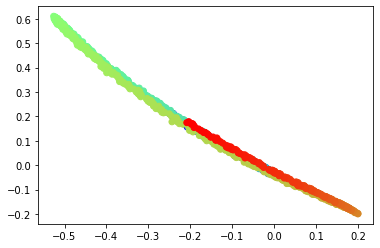

In [9]:
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()

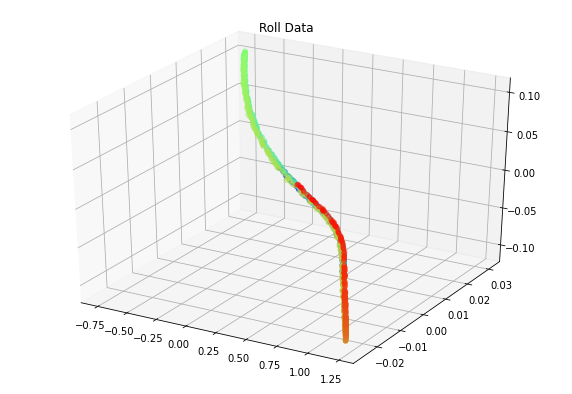

In [10]:
rcvrd = dec.predict(reduced)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(rcvrd[:,0], rcvrd[:,1], rcvrd[:,2], color = color)
plt.title("Roll Data")
plt.show()

### LAB 12-3 오토인코더를 이용한 이미지 압축과 복원

In [12]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [13]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(64, input_shape=(784, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(64, activation='elu')])
dec = models.Sequential([layers.Dense(64, input_shape=(64, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(784, activation='elu')])

In [15]:
AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 64)                58560     
_________________________________________________________________
sequential_7 (Sequential)    (None, 784)               59280     
Total params: 117,840
Trainable params: 117,840
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2891.9687
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1359.1708
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1193.0582
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1121.4962
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1059.0922
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1029.5486
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1007.5416
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 988.5442
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 972.7694
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 953.7048
Epoch 11/15
1875/1875 [==============================] - 4s 2ms/step - loss: 946.6623
Epoch 12/15
1875/1875 [==============================] -

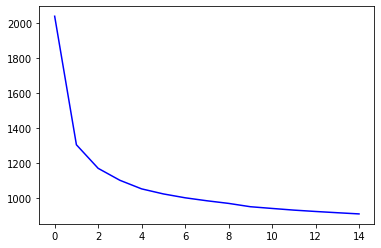

In [16]:
X = train_images.reshape(-1, 28*28)
history = AE.fit(X, X, epochs = 15)
plt.plot(history.history['loss'], 'b-')

In [17]:
rndidx = np.random.randint(0, len(train_images) - 50)
data = X[rndidx:rndidx+50]
train_reduced = enc.predict(data)
print(train_reduced.shape)

(50, 64)


<Figure size 432x288 with 0 Axes>

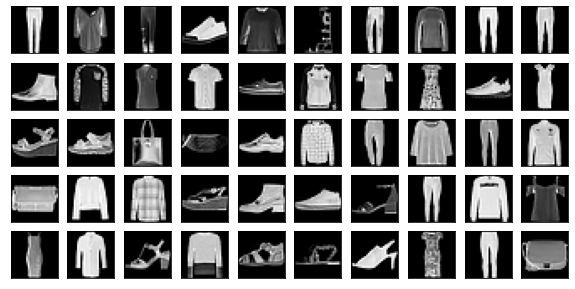

<Figure size 432x288 with 0 Axes>

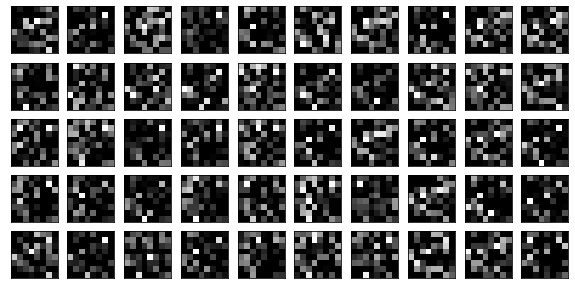

In [18]:
plot_images(5, 10, data.reshape(-1, 28, 28))
plot_images(5, 10, train_reduced.reshape(-1, 8, 8))

<Figure size 432x288 with 0 Axes>

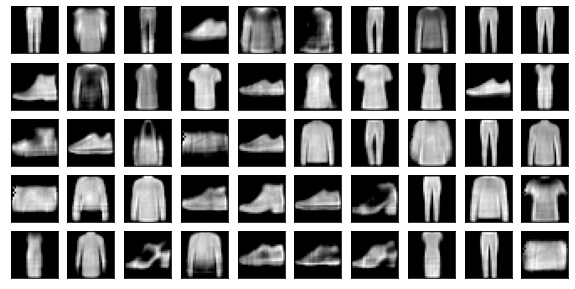

In [19]:
recovered = dec.predict(train_reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))

<Figure size 432x288 with 0 Axes>

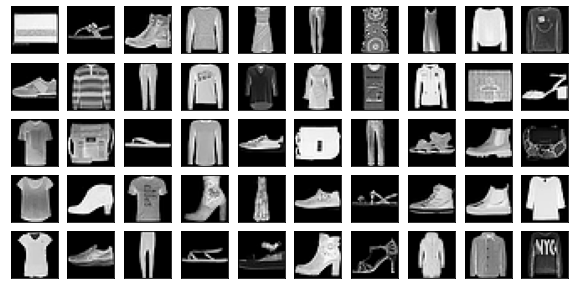

In [20]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

<Figure size 432x288 with 0 Axes>

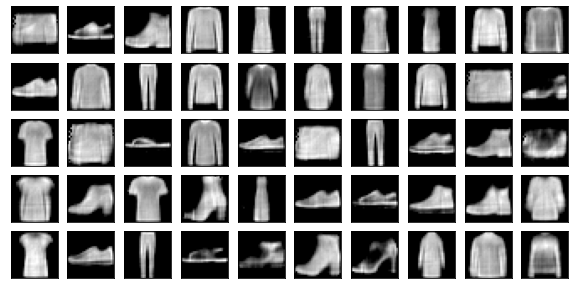

In [21]:
sample_flat = samples.reshape(-1, 28*28)
sample_reduced = enc.predict(sample_flat)
recovered = dec.predict(sample_reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))

In [22]:
enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(64, activation='elu')])
enc_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                589888    
Total params: 592,368
Trainable params: 592,368
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(64, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 9216)              599040    
_________________________________________________________________
reshape (Reshape)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 601,505
Trainable params: 601,505
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 124s 66ms/step - loss: 2151.5389
Epoch 2/15
1875/1875 [==============================] - 123s 65ms/step - loss: 831.2031
Epoch 3/15
1875/1875 [==============================] - 123s 66ms/step - loss: 702.1555
Epoch 4/15
1875/1875 [==============================] - 123s 66ms/step - loss: 641.4143
Epoch 5/15
1875/1875 [==============================] - 123s 66ms/step - loss: 607.9568
Epoch 6/15
1875/1875 [==============================] - 123s 66ms/step - loss: 580.0002
Epoch 7/15
1875/1875 [==============================] - 123s 66ms/step - loss: 557.1429
Epoch 8/15
1875/1875 [==============================] - 123s 66ms/step - loss: 541.6644
Epoch 9/15
1875/1875 [==============================] - 124s 66ms/step - loss: 527.4404
Epoch 10/15
1875/1875 [==============================] - 125s 67ms/step - loss: 515.3470
Epoch 11/15
1875/1875 [==============================] - 127s 68ms/step - loss: 508.2047
Epoch 12/15
1875/1875 [======

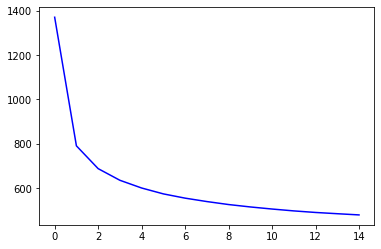

In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

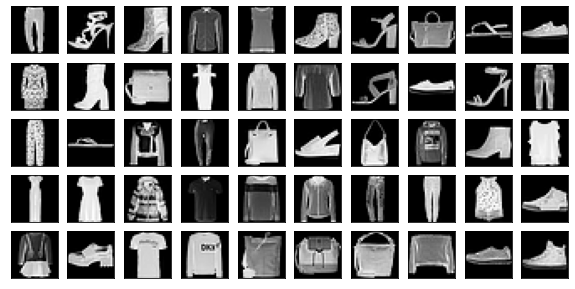

In [ ]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

<Figure size 432x288 with 0 Axes>

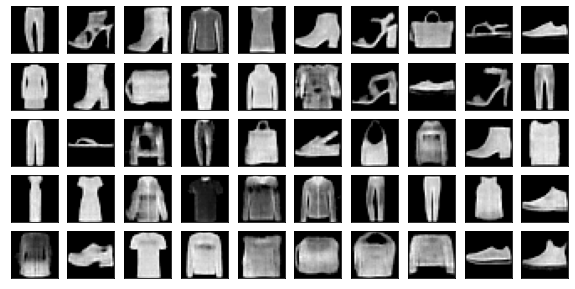

In [ ]:
samples = samples.reshape(-1, 28, 28, 1)
reduced = enc_cnn.predict(samples)
recovered = dec_cnn.predict(reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))

### LAB 12-4 오토인코더를 이용한 데이터 생성

In [1]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [2]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [4]:
enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(100, activation='elu')])
enc_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               921700    
Total params: 924,180
Trainable params: 924,180
Non-trainable params: 0
_________________________________________________________________


In [5]:
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(100, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9216)              930816    
_________________________________________________________________
reshape (Reshape)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 933,281
Trainable params: 933,281
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 39s 4ms/step - loss: 1968.5387
Epoch 2/15
1875/1875 [==============================] - 7s 3ms/step - loss: 737.3444
Epoch 3/15
1875/1875 [==============================] - 7s 3ms/step - loss: 605.0854
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 550.2475
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 514.2480
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 492.1699
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 475.0007
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 454.6281
Epoch 9/15
1875/1875 [==============================] - 7s 3ms/step - loss: 443.2013
Epoch 10/15
1875/1875 [==============================] - 7s 3ms/step - loss: 428.8498
Epoch 11/15
1875/1875 [==============================] - 7s 3ms/step - loss: 419.3173
Epoch 12/15
1875/1875 [==============================] - 7s 3

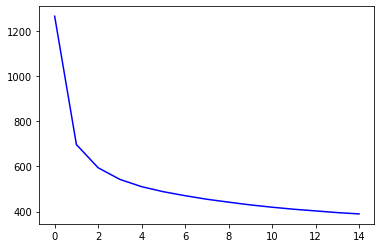

In [6]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

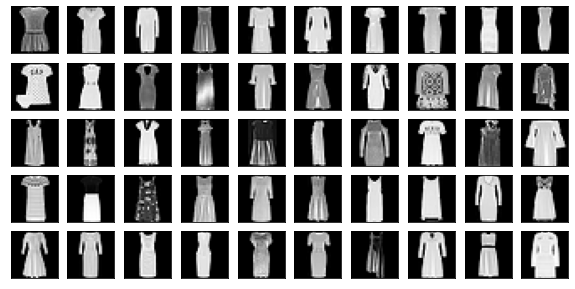

In [ ]:
# 드레스만 인코딩하여 잠재표현을 얻자
dress_idx = train_labels == 3    # 드레스의 클래스 번호는 3
dress_array = train_images[dress_idx]
plot_images(5, 10, dress_array.reshape(-1, 28, 28))

(60000, 28, 28)


<Figure size 432x288 with 0 Axes>

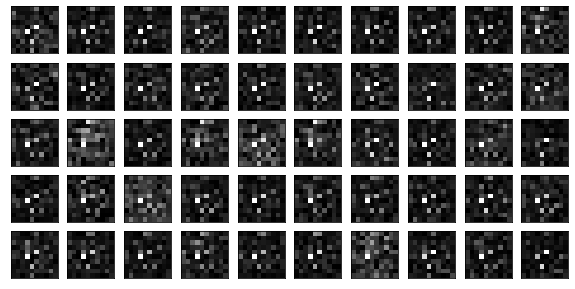

In [ ]:
print(train_images.shape)
dress_array = dress_array.reshape(-1,28,28, 1)
dress_encoded = enc_cnn.predict(dress_array)
plot_images(5, 10, dress_encoded.reshape(-1, 10, 10))

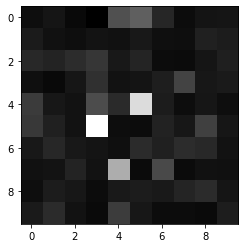

In [ ]:
dress_latent = dress_encoded.mean(axis = 0)
plt.imshow(dress_latent.reshape(10,10), cmap='gray')

In [ ]:
dress_latent_augmented = []
for _ in range(50):
    # 잠재 표현에 잡음 추가
    new_dress = dress_latent*(1+np.random.randn(100)*0.3)
    dress_latent_augmented.append(new_dress)  # 잡음 추가된 데이터를 리스트화
# 변형된 잠재 표현의 리스트를 넘파이 배열로 바꾼다.
dress_latent_augmented = np.array(dress_latent_augmented)

<Figure size 432x288 with 0 Axes>

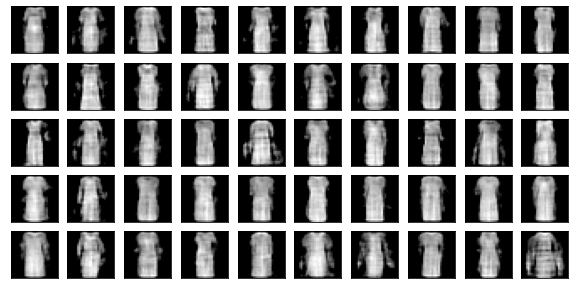

In [ ]:
dress_generated = dec_cnn.predict([dress_latent_augmented])
plot_images(5, 10, dress_generated.reshape(-1, 28, 28))

---

### 12장 미니 프로젝트 A2 잡음제거: 오토인코더 활용

#### 1. 데이터 확인과 준비

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

#### 2. 이미지 읽어 들이기

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'

imgR, imgC, channel = 63, 63, 3
images = []

for i in range(40):
   file = url + 'img{0:02d}.jpg'.format(i+1)    # 이미지 파일 이름을 만든다
   img = imread(file)                           # 이미지를 읽는다
   img = resize(img, (imgR,imgC, channel))      # 이미지의 크기를 변경한다
   images.append(img)                           # img에 담는다

<Figure size 432x288 with 0 Axes>

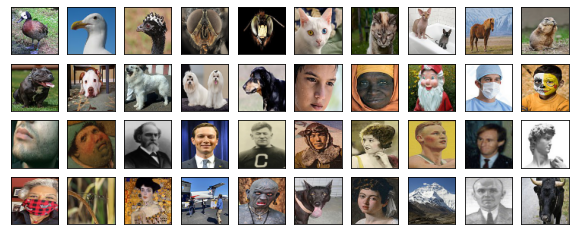

In [ ]:
def plot_images(nRow, nCol, img):
   fig = plt.figure()
   fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
   for i in range(nRow):
       for j in range(nCol):
           if nRow <= 1: axis = ax[j]
           else:         axis = ax[i, j]
           axis.get_xaxis().set_visible(False)
           axis.get_yaxis().set_visible(False)
           axis.imshow(img[i*nCol+j])

plot_images(4, 10, images)

#### 3. 훈련용 데이터와 검증용 데이터 분리

<Figure size 432x288 with 0 Axes>

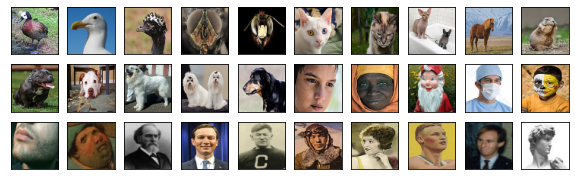

<Figure size 432x288 with 0 Axes>

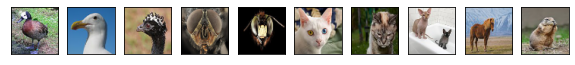

In [ ]:
X = np.array(images[:30])
X_test =np.array(images[30:])
plot_images(3, 10, X)
plot_images(1, 10, X)

#### 4. 입력 데이터 준비

<Figure size 432x288 with 0 Axes>

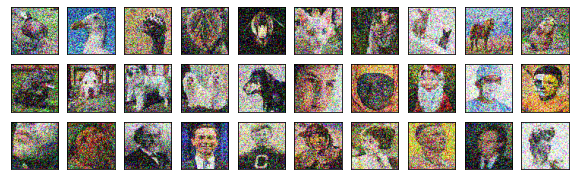

<Figure size 432x288 with 0 Axes>

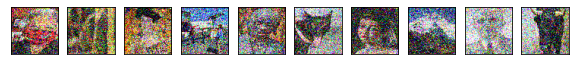

In [ ]:
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel)*0.3
X_noisy = np.clip(X_noisy, 0, 1)

X_test_noisy =  X_test \
             +  np.random.randn(len(X_test), imgR, imgC, channel)*0.3
X_test_noisy = np.clip(X_test_noisy, 0, 1)

plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

#### 5. 오토인코더 만들기

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
enc_cnn = models.Sequential([
            layers.Conv2D(filters=16, kernel_size=3, 
                  strides=(3,3), activation='elu', input_shape=(63,63,3)),
            layers.Conv2D(filters=8, kernel_size=3, activation='elu'),
            layers.Flatten(),
            layers.Dense(1024, activation='elu')])
enc_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 16)        448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2888)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2958336   
Total params: 2,959,944
Trainable params: 2,959,944
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dec_cnn = models.Sequential([
      layers.Dense(2888, input_shape=(1024, ), activation='elu'),
      layers.Reshape(target_shape=(19,19,8)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=3, kernel_size=3, strides=(3,3),
                             activation='elu')])
dec_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2888)              2960200   
_________________________________________________________________
reshape_1 (Reshape)          (None, 19, 19, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 21, 21, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 63, 63, 3)         435       
Total params: 2,961,803
Trainable params: 2,961,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
AE_CNN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 1024)              2959944   
_________________________________________________________________
sequential_7 (Sequential)    (None, 63, 63, 3)         2961803   
Total params: 5,921,747
Trainable params: 5,921,747
Non-trainable params: 0
_________________________________________________________________


#### 6. 오토인코더 학습시키기

Epoch 1/100
1/1 [==============================] - 1s 726ms/step - loss: 0.2936
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2935
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3022
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2898
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2497
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2137
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1997
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1843
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1743
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1644
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1592
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1495
Epoch 13/100
1/1 [==============================]

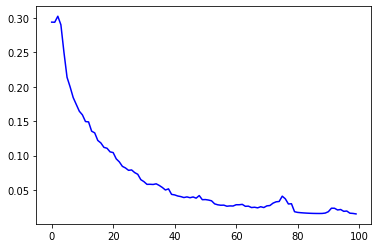

In [ ]:
history = AE_CNN.fit(X_noisy, X, epochs = 100)
plt.plot(history.history['loss'], 'b-')

#### 7. 훈련용 데이터와 테스트 데이터 잡음 제거

<Figure size 432x288 with 0 Axes>

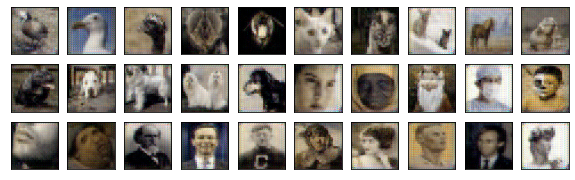

In [ ]:
denoised_result = AE_CNN.predict(X_noisy)
denoised_result = np.clip(denoised_result, 0,1)
plot_images(3, 10, denoised_result)

<Figure size 432x288 with 0 Axes>

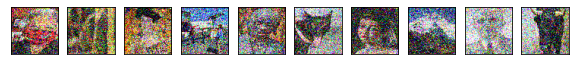

<Figure size 432x288 with 0 Axes>

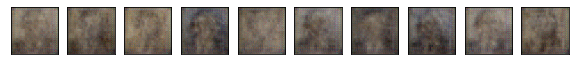

In [ ]:
denoised_result = AE_CNN.predict(X_test_noisy)
denoised_result = np.clip(denoised_result, 0,1)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised_result)

#### 8. 데이터를 증강하여 훈련 효과 높이기

In [ ]:
### Label Augmentation ####
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=360,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

In [ ]:
y_aug = X.reshape(-1, imgR, imgC, channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

In [ ]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.3


In [ ]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.3

n_augmentation = 400
for _ in range(n_augmentation):
   new_y = it.next()
   new_X = new_y + np.random.randn(nData, imgR, imgC, channel)*0.3
   y_aug = np.append(y_aug, new_y, axis=0)   
   X_aug = np.append(X_aug, new_X, axis=0)

y_aug = y_aug.reshape(-1, imgR, imgC, channel)
X_aug = X_aug.reshape(-1, imgR, imgC, channel)
print(y_aug.shape)

(12030, 63, 63, 3)


<Figure size 432x288 with 0 Axes>

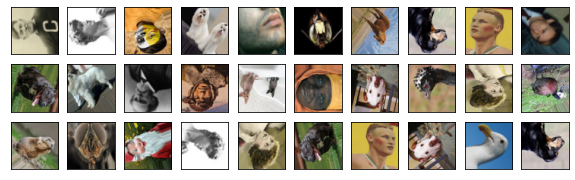

<Figure size 432x288 with 0 Axes>

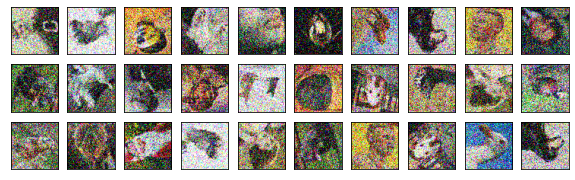

In [ ]:
y_aug = np.clip(y_aug, 0, 1)
X_aug = np.clip(X_aug, 0, 1)
start_idx = 157
plot_images(3, 10, y_aug[start_idx: start_idx+30])
plot_images(3, 10, X_aug[start_idx: start_idx+30])

#### 9. 증강 데이터로 학습하고 잡음 제거 실시

Epoch 1/50
376/376 [==============================] - 3s 8ms/step - loss: 0.0323
Epoch 2/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0168
Epoch 3/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0128
Epoch 4/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0109
Epoch 5/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0098
Epoch 6/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0090
Epoch 7/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0084
Epoch 8/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0080
Epoch 9/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0076
Epoch 10/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0073
Epoch 11/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0071
Epoch 12/50
376/376 [==============================] - 3s 7ms/step - loss: 0.0068
Epoch 13/50
376/376 [====

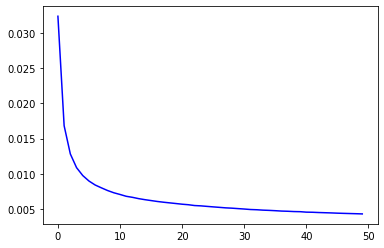

In [ ]:
history = AE_CNN.fit(X_aug, y_aug, epochs = 50)
plt.plot(history.history['loss'], 'b-')


<Figure size 432x288 with 0 Axes>

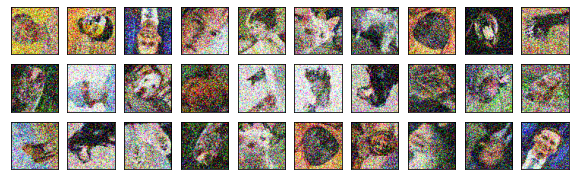

<Figure size 432x288 with 0 Axes>

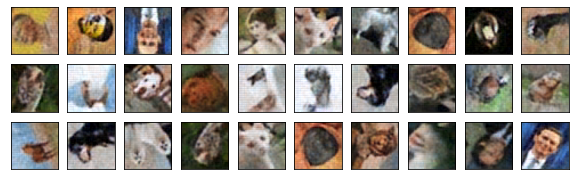

In [ ]:
denoised_result = AE_CNN.predict(X_aug)
denoised_result = np.clip(denoised_result, 0, 1)
plot_images(3, 10, X_aug[100:130])
plot_images(3, 10, denoised_result[100:130])

<Figure size 432x288 with 0 Axes>

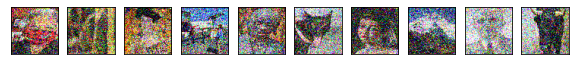

<Figure size 432x288 with 0 Axes>

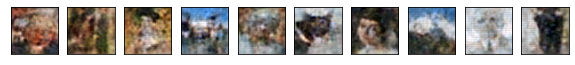

In [ ]:
denoised_result = AE_CNN.predict(X_test_noisy)
denoised_result = np.clip(denoised_result, 0, 1)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised_result)

### 12장 미니 프로젝트 C1 차원축소: 데이터 분포 가시화

#### 1. 데이터 준비와 오토인코더 만들기

In [ ]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있다. 학습용과 테스트용으로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
enc_cnn = models.Sequential([
      layers.Conv2D(filters=16, kernel_size=3, activation='elu',
                    input_shape=(28,28,1)),
      layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
      layers.Flatten(),
      layers.Dense(128, activation='elu')])
enc_cnn.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
Total params: 1,182,256
Trainable params: 1,182,256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dec_cnn = models.Sequential([
     layers.Dense(9216, input_shape=(128, ), activation='elu'),
     layers.Reshape(target_shape=(24,24,16)),
     layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
     layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 9216)              1188864   
_________________________________________________________________
reshape_2 (Reshape)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 1,191,329
Trainable params: 1,191,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
AE_CNN.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 128)               1182256   
_________________________________________________________________
sequential_10 (Sequential)   (None, 28, 28, 1)         1191329   
Total params: 2,373,585
Trainable params: 2,373,585
Non-trainable params: 0
_________________________________________________________________


#### 2. 훈련을 통해 잠재 표현 생성 능력 만들기

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1859.6737
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 651.8502
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 537.6434
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 486.5651
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 450.7458
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 429.6997
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 412.5350
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 397.0612
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 389.1368
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 378.3839
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 371.3620
Epoch 12/15
1875/1875 [==============================] - 7s 4m

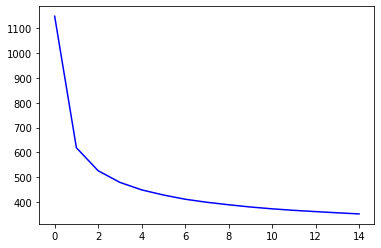

In [ ]:
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

#### 3. 잠재 표현의 차원 축소화 기사화

In [ ]:
from sklearn import manifold
TSNE = manifold.TSNE(n_components=2)

In [ ]:
latent_representation = enc_cnn.predict(X_cnn[:3000])
embedding = TSNE.fit_transform(latent_representation)

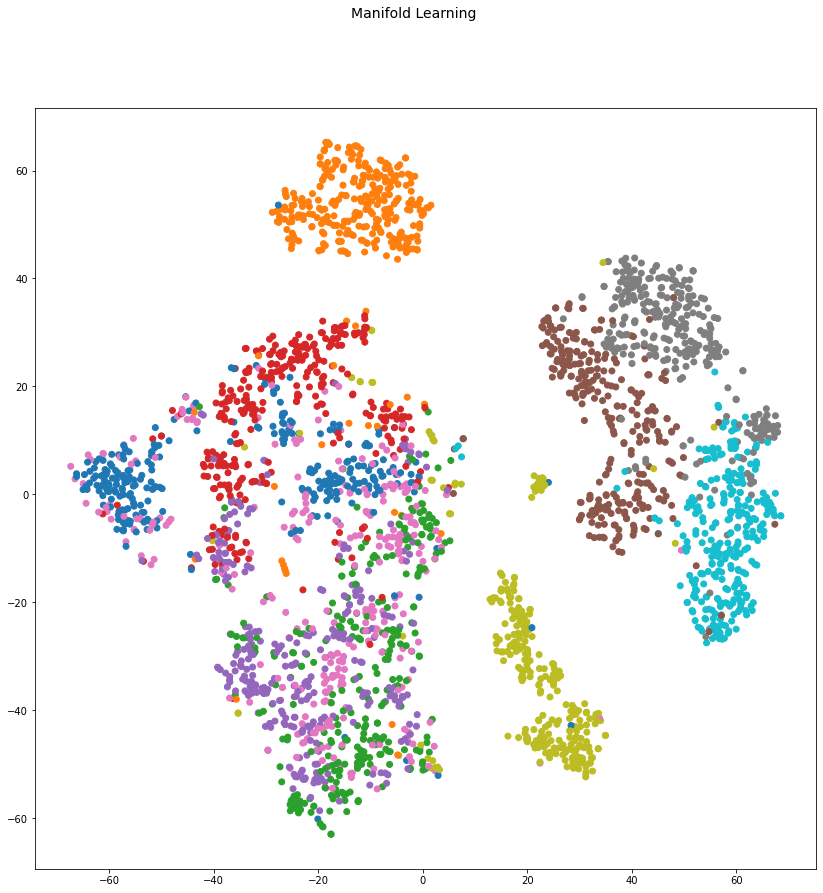

In [ ]:
fig = plt.figure(figsize = (14, 14))
fig.suptitle("Manifold Learning", fontsize=14)
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=train_labels[:3000], cmap='tab10')
plt.show()